In [1]:
## Importing the necessary packages ##

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Flatten , MaxPooling2D

import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets begin by importing the dataset.

In [2]:
## Importing the dataset ##

sign_data = pd.read_csv('sign_mnist_train.csv')

## Displaying the first 5 entries of the dataset ##

sign_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Its always better to check the shape of the dataset to analyse further.

In [3]:
## Checking shape of Dataset ##

print('Number of Samples :' , len(sign_data))

print('Number of Pixels :' , sign_data.shape[1] - 1)

Number of Samples : 27455
Number of Pixels : 784


Okay so there are basically 27455 images and 784 pixels with one column being the target label itself. 

Lets pull out the label and transform the dataset into numpy arrays.

In [4]:
## Separating the labels ##

int_labels = sign_data['label'].to_numpy()

actual_labels = list(string.ascii_lowercase)
actual_labels

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [5]:
## Getting the pixels ##

sign_data.drop('label' , axis = 1 , inplace = True)

sign_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [6]:
## Transforming the pixels into numpy arrays and setting them in a range of (0 , 1) ##

pixels = sign_data.to_numpy().reshape(-1 , 28 , 28 , 1) / 255.

pixels

array([[[[0.41960784],
         [0.4627451 ],
         [0.49803922],
         ...,
         [0.66666667],
         [0.66666667],
         [0.6627451 ]],

        [[0.43529412],
         [0.4745098 ],
         [0.50588235],
         ...,
         [0.67058824],
         [0.67058824],
         [0.66666667]],

        [[0.44313725],
         [0.48235294],
         [0.51372549],
         ...,
         [0.67058824],
         [0.67058824],
         [0.67058824]],

        ...,

        [[0.55686275],
         [0.58823529],
         [0.62352941],
         ...,
         [0.79215686],
         [0.78823529],
         [0.78431373]],

        [[0.55686275],
         [0.59215686],
         [0.62745098],
         ...,
         [0.8       ],
         [0.79607843],
         [0.79215686]],

        [[0.55686275],
         [0.59215686],
         [0.62745098],
         ...,
         [0.8       ],
         [0.79607843],
         [0.79215686]]],


       [[[0.60784314],
         [0.61568627],
         [0.61

Done!! 

Lets visualize an image.

Index is : 17673
Label is : x


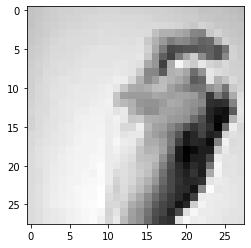

In [7]:
## Visualizing an image ##
np.random.seed(10)

idx = int(np.random.randint(low = 0 , high = len(pixels) , size = 1))

print('Index is :' , idx)
print('Label is :' , actual_labels[int_labels[idx]])
plt.imshow(pixels[idx] , cmap = 'gray')
plt.show()

Lets define the model.

In [14]:
model = Sequential([
    Conv2D(filters = 256 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = 'SAME' , activation = 'relu' , input_shape = (28 , 28 , 1)),
    MaxPooling2D(pool_size = (2 , 2) , strides = 2),
    Conv2D(filters = 128 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = 'SAME' , activation = 'relu'),
    MaxPooling2D(pool_size = (2 , 2) , strides = 2),
    Conv2D(filters = 64 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = 'SAME' , activation = 'relu'),
    MaxPooling2D(pool_size = (2 , 2) , strides = 2),
    Conv2D(filters = 32 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = 'SAME' , activation = 'relu'),
    MaxPooling2D(pool_size = (2 , 2) , strides = 2),
    Flatten(),
    Dense(25 , activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy' , 
              optimizer = 'adam' ,
              metrics = ['accuracy'])

Now we will train the model, but with validation set.

So, lets import the validation set too.

In [12]:
sign_val = pd.read_csv('sign_mnist_test.csv')

val_labels = sign_val['label'].to_numpy()

sign_val.drop('label' , axis = 1 , inplace = True)

val_pixels = sign_val.to_numpy().reshape(-1 , 28 , 28 , 1) / 255.

Lets train.

In [15]:
history = model.fit(x = pixels ,
          y = int_labels , 
          batch_size = 128 , 
          epochs = 50,
          validation_data = (val_pixels , val_labels) , 
          shuffle = True)

Train on 27455 samples, validate on 7172 samples
Epoch 1/50
27455/27455 [==============================] - 21s 762us/sample - loss: 2.2024 - accuracy: 0.3352 - val_loss: 1.0906 - val_accuracy: 0.6325
Epoch 2/50
27455/27455 [==============================] - 9s 319us/sample - loss: 0.4301 - accuracy: 0.8643 - val_loss: 0.5988 - val_accuracy: 0.8097
Epoch 3/50
27455/27455 [==============================] - 9s 319us/sample - loss: 0.1090 - accuracy: 0.9710 - val_loss: 0.4735 - val_accuracy: 0.8666
Epoch 4/50
27455/27455 [==============================] - 9s 319us/sample - loss: 0.0283 - accuracy: 0.9958 - val_loss: 0.4662 - val_accuracy: 0.8759
Epoch 5/50
27455/27455 [==============================] - 9s 320us/sample - loss: 0.0098 - accuracy: 0.9994 - val_loss: 0.4667 - val_accuracy: 0.8787
Epoch 6/50
27455/27455 [==============================] - 9s 320us/sample - loss: 0.0051 - accuracy: 0.9999 - val_loss: 0.4779 - val_accuracy: 0.8852
Epoch 7/50
27455/27455 [==========================

Done.

Lets plot the loss and accuracy curves.

In [16]:
## Setting the loss and accuracy dataframe ##

df = pd.DataFrame(history.history)

df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.202373,0.335167,1.090649,0.632460
1,0.430106,0.864251,0.598814,0.809677
2,0.109021,0.970971,0.473476,0.866564
3,0.028335,0.995811,0.466208,0.875906
4,0.009845,0.999381,0.466734,0.878695


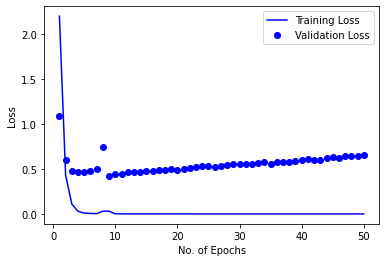

In [21]:
## Plotting loss curve ##

epoch = range(1 , len(df) + 1)

loss = df['loss']
val_loss = df['val_loss']

plt.plot(epoch , loss , 'b' , label = 'Training Loss')
plt.plot(epoch , val_loss , 'bo' , label = 'Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

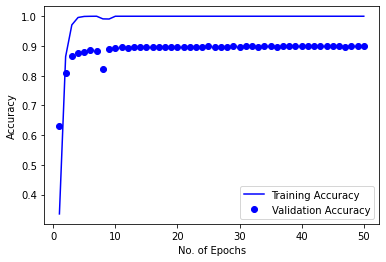

In [22]:
## Plotting accuracy curve ##

epoch = range(1 , len(df) + 1)

acc = df['accuracy']
val_acc = df['val_accuracy']

plt.plot(epoch , acc , 'b' , label = 'Training Accuracy')
plt.plot(epoch , val_acc , 'bo' , label = 'Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [23]:
## Saving model ##

model.save('sign_language_model.h5')

Done! 
Thank you!
Thats all.